## Decision Tree

##### It is a rule-based algorithm that works on the principle of recursive partitioning.

Non-parametric supervised learning method for regression & Classification.
The nodes are questions & leafs are prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
play_data = pd.read_csv("C:/Users/haris/Downloads/Decision Tree/tennis.csv.txt")

In [5]:
play_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


#### Decision Tree Algorithm

Decision Tree is based on (CART)

scikit-learn decision trees are based on CART

#### Criterion of creating Decision Tree

##### Entropy-

 Entropy is an information theory metric that measures the impurity or uncertainty in a group of observations. It determines how a decision tree chooses to split data.

##### Gini Index-

Both gini and entropy are measures of impurity of a node.



##### Entropy of play

Entropy(play) = – p(Yes) . log2p(Yes) – p(No) . log2p(No)

In [7]:
play_data.play

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object

In [8]:
play_data.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

In [9]:
Entropy_Play = -(9/14)*np.log2(9/14) -(5/14)*np.log2(5/14)

In [10]:
Entropy_Play

0.9402859586706311

#### Information Gain
The information gain is based on the decrease in entropy after a dataset is split on an attribute.
Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).

Gain(S, A) = Entropy(S) – ∑ [ p(S|A) . Entropy(S|A) ]
We intend to choose the attribute, splitting by which information gain will be the most
Next step is calculating information gain for all attributes

Information gain is calculated by comparing the entropy of the dataset before and after a transformation.


In [12]:
play_data[play_data.outlook=='sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [13]:
# Entropy(Play|Outlook=Sunny)
Entropy_play_Outlook_Sunny = -(3/5)*np.log2(3/5) - (2/5)*np.log2(2/5)

In [14]:
Entropy_play_Outlook_Sunny

0.9709505944546686

In [15]:
play_data[play_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


In [16]:
# Entropy(Play|Outlook=overcast)
# Since, it's a homogenous data entropy will be 0

In [17]:
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [18]:
# Entropy(Play|Outlook=rainy)
Entropy_Play_Outlook_Rain = -(2/5)*np.log2(2/5) - (3/5)*np.log2(3/5)

In [19]:
Entropy_Play_Outlook_Rain

0.9709505944546686

Other gains

Gain(Play, Temperature) - 0.029

Gain(Play, Humidity) - 0.151

Gain(Play, Wind) - 0.048


##### Conclusion - Outlook is winner & thus becomes root of the tree

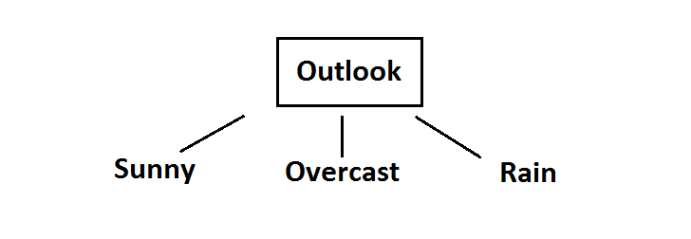

###### Lets find the next splitting criteria

In [22]:
play_data[play_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


##### Conclusion - If outlook is overcast, play is true

In [23]:
play_data[play_data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [24]:
# Entropy(Play_Sunny|)
Entropy_Play_Outlook_Sunny =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

In [26]:
Entropy_Play_Outlook_Sunny

0.9709505944546686

##### Information Gain for humidity

In [28]:
Entropy_Play_Outlook_Sunny - (3/5)*0 - (2/5)*0

0.9709505944546686

##### Information Gain for windy

In [29]:
Entropy_Wind_False = -(1/3)*np.log2(1/3) - (2/3)*np.log2(2/3)
Entropy_Wind_False

0.9182958340544896

In [30]:
Entropy_Play_Outlook_Sunny - (3/5)* Entropy_Wind_False  - (2/5)*1

0.01997309402197489

##### Information Gain for temperature

In [31]:
Entropy_Play_Outlook_Sunny - (2/5)*0 - (1/5)*0 - (2/5)* 1

0.5709505944546686

##### Conclusion : Humidity is the best choice on sunny branch

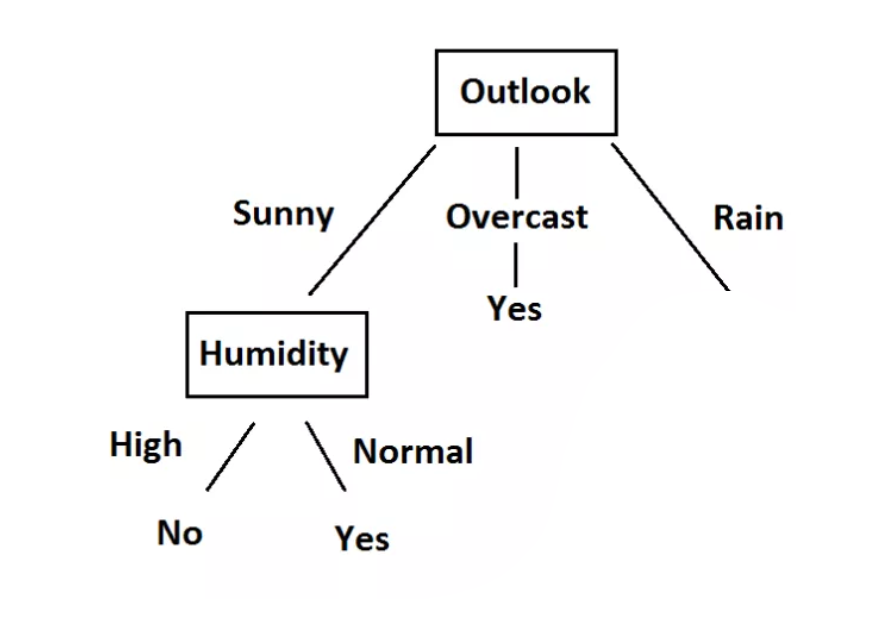

In [32]:
play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'high')]

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no


In [33]:

play_data[(play_data.outlook == 'sunny') & (play_data.humidity == 'normal')]

,outlook,temp,humidity,windy,play
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


##### Splitting the rainy branch

In [37]:
play_data[play_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [38]:
# Entropy(Play_Rainy|)
Entropy_Play_Outlook_Rainy =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)
Entropy_Play_Outlook_Rainy

0.9709505944546686

##### Information Gain for temp

In [39]:
Entropy_Play_Outlook_Rainy - (3/5)*0.918 - (2/5)*1

0.020150594454668602

##### Information Gain for Windy

In [41]:
Entropy_Play_Outlook_Rainy - (2/5)*0 - (3/5)*0

0.9709505944546686

##### Information Gain for Humidity

In [44]:
Entropy_Play_Outlook_Rainy_Normal = -(1/3)*np.log2(1/3) - (2/3)*np.log2(2/3)
Entropy_Play_Outlook_Rainy_Normal

0.9182958340544896

In [45]:
Entropy_Play_Outlook_Rainy - (2/5)*1 - (3/5)*Entropy_Play_Outlook_Rainy_Normal

0.01997309402197489

#### Final Tree

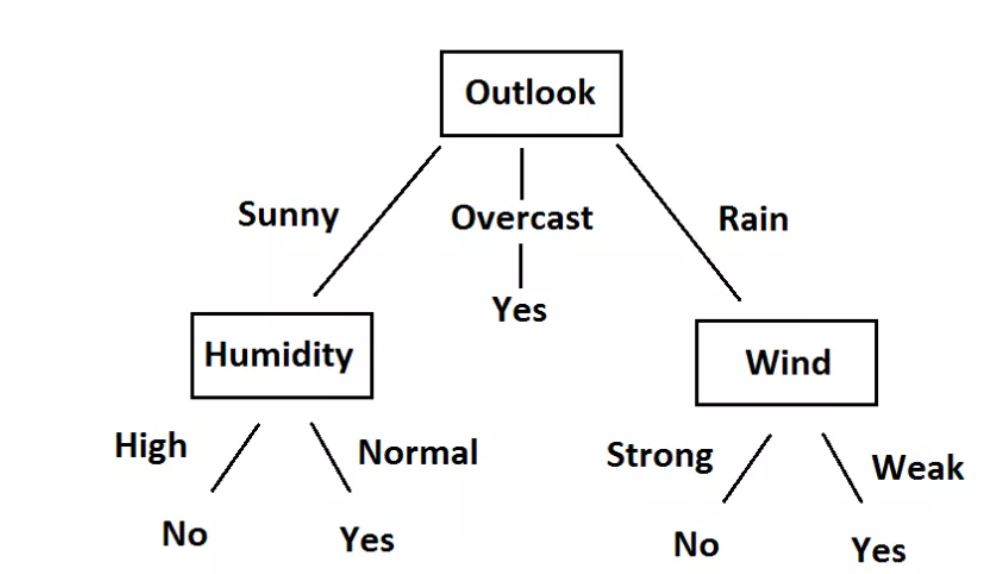